找到 1600 张图片，开始提取特征…
✔ 特征矩阵形状： (1600, 1072)
开始 KMeans 聚类（簇数=10）…


c:\Users\golds\miniconda3\envs\torch_pig\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\golds\miniconda3\envs\torch_pig\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\golds\miniconda3\envs\torch_pig\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\golds\miniconda3\envs\torch_pig\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\golds\miniconda3\envs\torch_pig\Lib\subprocess.py", line 1538, in _exec

✔ 聚类完成，各簇样本数： [ 94  77  90  34  28  18 859  26 322  52]
PCA 降维到 2 维，绘制散点图…


C:\Users\golds\AppData\Local\Temp\ipykernel_38532\3733090405.py:71: UserWarning: Glyph 32452 (\N{CJK UNIFIED IDEOGRAPH-7EC4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\golds\AppData\Local\Temp\ipykernel_38532\3733090405.py:71: UserWarning: Glyph 20214 (\N{CJK UNIFIED IDEOGRAPH-4EF6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\golds\AppData\Local\Temp\ipykernel_38532\3733090405.py:71: UserWarning: Glyph 39318 (\N{CJK UNIFIED IDEOGRAPH-9996}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\golds\AppData\Local\Temp\ipykernel_38532\3733090405.py:71: UserWarning: Glyph 39280 (\N{CJK UNIFIED IDEOGRAPH-9970}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\golds\AppData\Local\Temp\ipykernel_38532\3733090405.py:71: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\golds\AppData\Local\Temp\ipykernel_38532\3733090405.py:71: UserWarning: Glyph 20687 (\

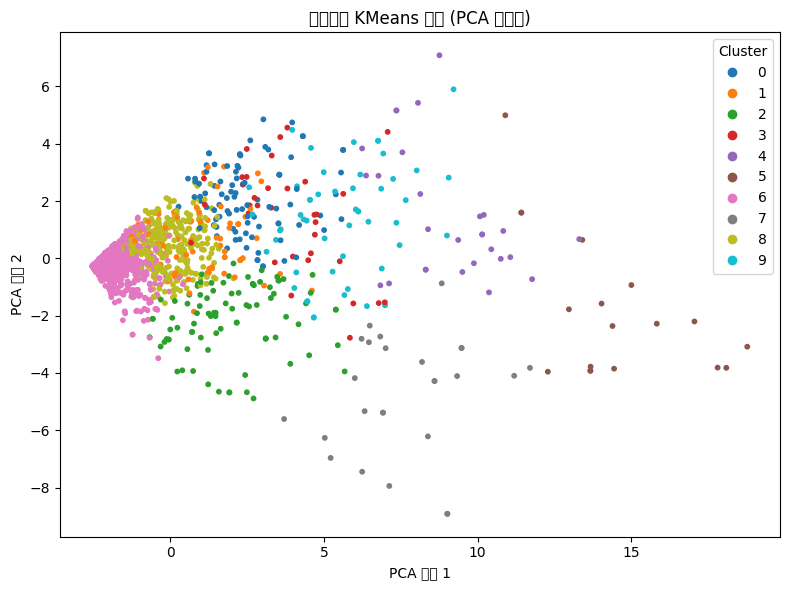

C:\Users\golds\AppData\Local\Temp\ipykernel_38532\3733090405.py:86: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\golds\AppData\Local\Temp\ipykernel_38532\3733090405.py:86: UserWarning: Glyph 20363 (\N{CJK UNIFIED IDEOGRAPH-4F8B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\golds\AppData\Local\Temp\ipykernel_38532\3733090405.py:86: UserWarning: Glyph 22914 (\N{CJK UNIFIED IDEOGRAPH-5982}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\golds\AppData\Local\Temp\ipykernel_38532\3733090405.py:86: UserWarning: Glyph 19979 (\N{CJK UNIFIED IDEOGRAPH-4E0B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\golds\miniconda3\envs\torch_pig\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\golds\miniconda3\envs\torch_pig\Lib\site-p

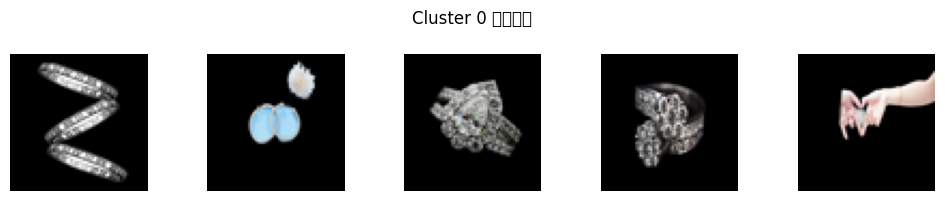

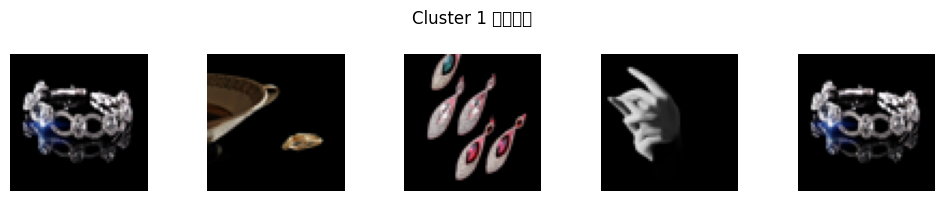

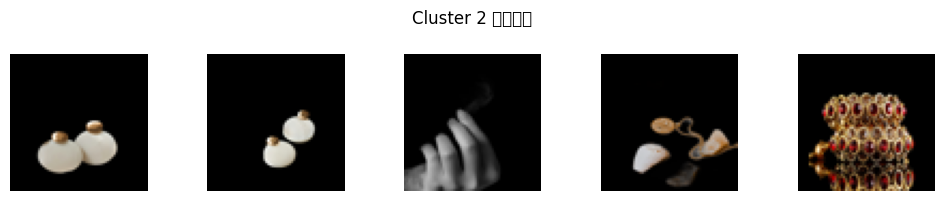

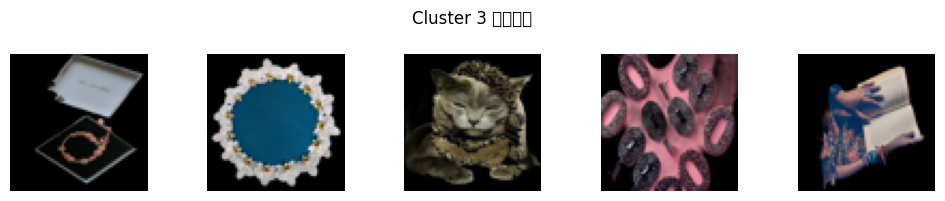

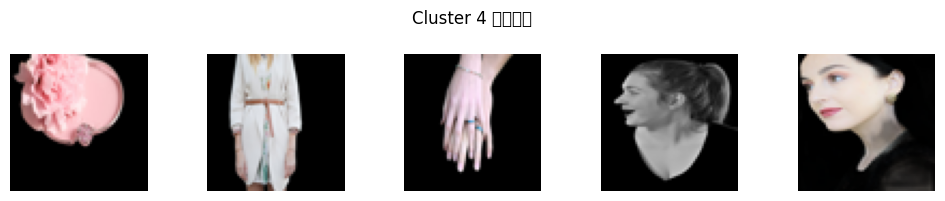

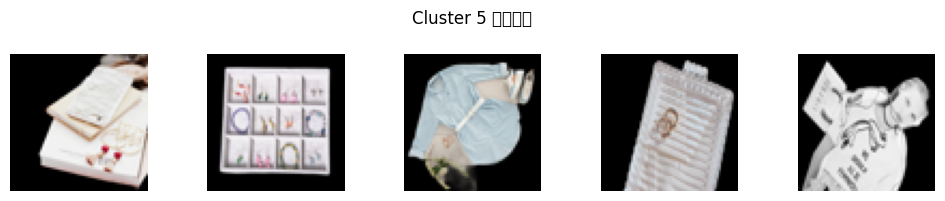

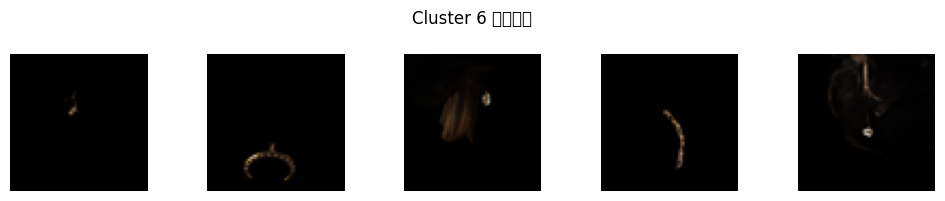

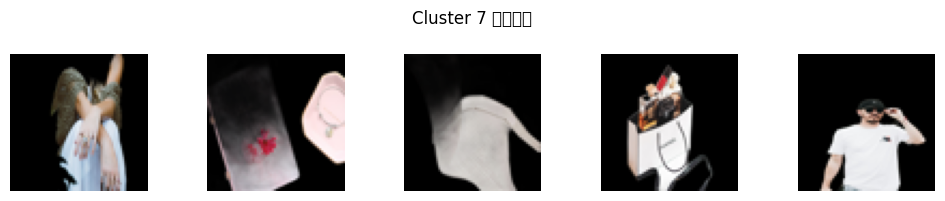

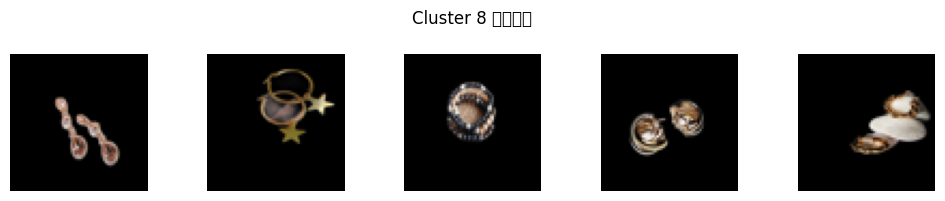

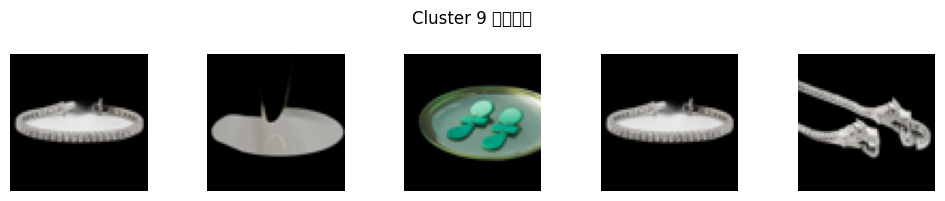

In [ ]:
import os
from glob import glob
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ——— parameter ———
IMAGE_DIR = r"C:\Users\golds\Desktop\Data-Driven Design\image"
# KMeans
N_CLUSTERS = 10

SAMPLES_PER_CLUSTER = 5

PCA_DIM = 2

THUMB_SIZE = (64, 64)

HIST_BINS = 16

# ——— 1. feature extract ———
def extract_features(path):
    img = Image.open(path).convert("RGB")
    arr = np.array(img)
    # 1)
    hists = []
    for ch in range(3):
        h, _ = np.histogram(arr[:,:,ch], bins=HIST_BINS, range=(0,255), density=True)
        hists.append(h)
    hist_feat = np.concatenate(hists)  # (16*3,)

    # 2)
    gray = img.convert("L").resize((32,32))
    gray_arr = np.array(gray).astype(np.float32).flatten() / 255.0  # (1024,)

    # final parameter
    return np.concatenate([hist_feat, gray_arr])  # (48+1024=1072,)

# ——— 2. scan all the images ———
paths = glob(os.path.join(IMAGE_DIR, "*.[jp][pn]g"))
print(f"find {len(paths)} images…")
features = []
good_paths = []
for p in paths:
    try:
        features.append(extract_features(p))
        good_paths.append(p)
    except Exception as e:
        print(f"⚠ error {p}: {e}")
X = np.vstack(features)  # (N,1072)
print("✔ matrix feature：", X.shape)

# ——— 3. KMeans  ———
print(f"start KMeans aggregation（cluster={N_CLUSTERS}）…")
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)
print("✔ aggregation complete：", np.bincount(labels))

# ——— 4. PCA visualization ———
print("PCA …")
pca = PCA(n_components=PCA_DIM, random_state=42)
proj = pca.fit_transform(X)  # (N,2)

plt.figure(figsize=(8,6))
scatter = plt.scatter(proj[:,0], proj[:,1], c=labels, cmap="tab10", s=10)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.title("jewelry KMeans aggregation (PCA visualization)")
plt.xlabel("PCA cluster 1")
plt.ylabel("PCA cluster 2")
plt.tight_layout()
plt.show()

# ——— 5.  ———
for cid in range(N_CLUSTERS):
    idxs = np.where(labels==cid)[0]
    if len(idxs)==0:
        continue
    sel = idxs[:SAMPLES_PER_CLUSTER]
    fig, axes = plt.subplots(1, len(sel), figsize=(len(sel)*2,2))
    for ax,i in zip(axes, sel):
        img = Image.open(good_paths[i]).convert("RGB").resize(THUMB_SIZE)
        ax.imshow(img)
        ax.axis("off")
    fig.suptitle(f"Cluster {cid} example", fontsize=12)
    plt.tight_layout()
    plt.show()


In [16]:
import os
from glob import glob
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# ——— 参数区 ———
IMAGE_DIR           = r"C:\Users\golds\Desktop\Data-Driven Design\image"
N_CLUSTERS          = 10
SAMPLES_PER_CLUSTER = 5
PCA_DIM             = 2
THUMB_SIZE          = (64, 64)
HIST_BINS           = 16

# 输出文件
CSV_OUT   = "clustering_results.csv"
PLOT_OUT  = "cluster_pca.png"
EXAMPLE_DIR = "cluster_examples"
os.makedirs(EXAMPLE_DIR, exist_ok=True)

# ——— 1. 特征提取函数 ———
def extract_features(path):
    img = Image.open(path).convert("RGB")
    arr = np.array(img)
    # 1) RGB 直方图 16-bin
    hists = []
    for ch in range(3):
        h, _ = np.histogram(arr[:,:,ch],
                            bins=HIST_BINS, range=(0,255), density=True)
        hists.append(h)
    hist_feat = np.concatenate(hists)
    # 2) 32×32 灰度扁平化
    gray = img.convert("L").resize((32,32))
    gray_arr = np.array(gray, dtype=np.float32).flatten() / 255.0
    return np.concatenate([hist_feat, gray_arr])

# ——— 2. 扫描 & 提取 ———
paths = glob(os.path.join(IMAGE_DIR, "*.[jp][pn]g"))
print(f"找到 {len(paths)} 张图片，开始特征提取…")
features = []; good_paths = []
for p in paths:
    try:
        features.append(extract_features(p))
        good_paths.append(p)
    except Exception as e:
        print(f"⚠ 无法处理 {p}: {e}")
X = np.vstack(features)
print("✔ 特征矩阵：", X.shape)

# ——— 3. KMeans 聚类 ———
print(f"开始 KMeans({N_CLUSTERS})…")
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)
print("✔ 各簇数量：", np.bincount(labels))

# ——— 4. PCA & 散点图 ———
print("PCA 降到 2 维并保存散点图…")
pca  = PCA(n_components=PCA_DIM, random_state=42)
proj = pca.fit_transform(X)

plt.figure(figsize=(8,6))
scatter = plt.scatter(proj[:,0], proj[:,1], c=labels, cmap="tab10", s=12)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.title("KMeans 聚类 (PCA 可视化)")
plt.xlabel("PCA 1"); plt.ylabel("PCA 2")
plt.tight_layout()
plt.savefig(PLOT_OUT, dpi=150)
plt.close()
print(f"✔ 散点图已保存为 {PLOT_OUT}")

# ——— 5. 导出 CSV ———
print("写入 CSV…")
df = pd.DataFrame({
    "path": good_paths,
    "cluster": labels,
    "pca1": proj[:,0],
    "pca2": proj[:,1],
})
df.to_csv(CSV_OUT, index=False, encoding="utf-8-sig")
print(f"✔ CSV 文件已保存为 {CSV_OUT}")

# ——— 6. 每簇示例图保存 ———
print("生成各簇示例缩略图…")
for cid in range(N_CLUSTERS):
    idxs = np.where(labels==cid)[0]
    if len(idxs)==0: continue
    sel = idxs[:SAMPLES_PER_CLUSTER]
    fig, axes = plt.subplots(1, len(sel), figsize=(len(sel)*2,2))
    for ax, i in zip(axes, sel):
        img = Image.open(good_paths[i]).convert("RGB").resize(THUMB_SIZE)
        ax.imshow(img); ax.axis("off")
    fig.suptitle(f"Cluster {cid} 示例", fontsize=10)
    fig.tight_layout()
    out_path = os.path.join(EXAMPLE_DIR, f"cluster_{cid}_examples.png")
    fig.savefig(out_path, dpi=100)
    plt.close(fig)
    print(f"  ✔ 簇 {cid} 示例图保存在 {out_path}")


找到 1600 张图片，开始特征提取…
✔ 特征矩阵： (1600, 1072)
开始 KMeans(10)…
✔ 各簇数量： [ 94  77  90  34  28  18 859  26 322  52]
PCA 降到 2 维并保存散点图…


C:\Users\golds\AppData\Local\Temp\ipykernel_38532\557000306.py:69: UserWarning: Glyph 32858 (\N{CJK UNIFIED IDEOGRAPH-805A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\golds\AppData\Local\Temp\ipykernel_38532\557000306.py:69: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\golds\AppData\Local\Temp\ipykernel_38532\557000306.py:69: UserWarning: Glyph 21487 (\N{CJK UNIFIED IDEOGRAPH-53EF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\golds\AppData\Local\Temp\ipykernel_38532\557000306.py:69: UserWarning: Glyph 35270 (\N{CJK UNIFIED IDEOGRAPH-89C6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\golds\AppData\Local\Temp\ipykernel_38532\557000306.py:69: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\golds\AppData\Local\Temp\ipykernel_38532\557000306.py:70: UserWarning: Glyph 32858 (\N{CJK 

✔ 散点图已保存为 cluster_pca.png
写入 CSV…
✔ CSV 文件已保存为 clustering_results.csv
生成各簇示例缩略图…
  ✔ 簇 0 示例图保存在 cluster_examples\cluster_0_examples.png
  ✔ 簇 1 示例图保存在 cluster_examples\cluster_1_examples.png


C:\Users\golds\AppData\Local\Temp\ipykernel_38532\557000306.py:96: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\golds\AppData\Local\Temp\ipykernel_38532\557000306.py:96: UserWarning: Glyph 20363 (\N{CJK UNIFIED IDEOGRAPH-4F8B}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\golds\AppData\Local\Temp\ipykernel_38532\557000306.py:98: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from font(s) DejaVu Sans.
  fig.savefig(out_path, dpi=100)
C:\Users\golds\AppData\Local\Temp\ipykernel_38532\557000306.py:98: UserWarning: Glyph 20363 (\N{CJK UNIFIED IDEOGRAPH-4F8B}) missing from font(s) DejaVu Sans.
  fig.savefig(out_path, dpi=100)


  ✔ 簇 2 示例图保存在 cluster_examples\cluster_2_examples.png
  ✔ 簇 3 示例图保存在 cluster_examples\cluster_3_examples.png
  ✔ 簇 4 示例图保存在 cluster_examples\cluster_4_examples.png
  ✔ 簇 5 示例图保存在 cluster_examples\cluster_5_examples.png
  ✔ 簇 6 示例图保存在 cluster_examples\cluster_6_examples.png
  ✔ 簇 7 示例图保存在 cluster_examples\cluster_7_examples.png
  ✔ 簇 8 示例图保存在 cluster_examples\cluster_8_examples.png
  ✔ 簇 9 示例图保存在 cluster_examples\cluster_9_examples.png


In [19]:
#!/usr/bin/env python3
"""
organize_by_cluster.py

Reads a CSV of clustering results (with columns 'path' and 'cluster'),
and copies each image into a subfolder named after its cluster.
"""

import os
import shutil
import pandas as pd

# ─── CONFIG ───────────────────────────────────────────────────────────────────
CSV_PATH    = r"C:\Users\golds\Desktop\Data-Driven Design\clustering_results.csv"
OUTPUT_DIR  = r"C:\Users\golds\Desktop\Data-Driven Design\clusters"
# ───────────────────────────────────────────────────────────────────────────────

def main():
    # 1) Read CSV
    df = pd.read_csv(CSV_PATH)
    if "path" not in df.columns or "cluster" not in df.columns:
        raise ValueError(
            f"CSV must contain 'path' and 'cluster' columns; got: {df.columns.tolist()}"
        )

    # 2) For each row, copy the file into its cluster folder
    for idx, row in df.iterrows():
        img_path = row["path"]
        cluster  = row["cluster"]

        if not os.path.isfile(img_path):
            print(f"⚠️  File not found: {img_path}")
            continue

        # Destination folder: OUTPUT_DIR/cluster_<label>
        dest_folder = os.path.join(OUTPUT_DIR, f"cluster_{cluster}")
        os.makedirs(dest_folder, exist_ok=True)

        # Copy image over
        fname = os.path.basename(img_path)
        dest_path = os.path.join(dest_folder, fname)
        try:
            shutil.copy2(img_path, dest_path)
        except Exception as e:
            print(f"❌  Failed to copy {img_path} → {dest_path}: {e}")

    print(f"✅  All images organized by cluster under: {OUTPUT_DIR}")

if __name__ == "__main__":
    main()


✅  All images organized by cluster under: C:\Users\golds\Desktop\Data-Driven Design\clusters
